In [ ]:
import pandas as pd
from OpenMeteograms import *

In [2]:
locations = nominatim('mondariz')

0 Mondariz, Condado, Pontevedra, Galicia, España
1 Mondariz, Condado, Pontevedra, Galicia, España


In [3]:
index = 0
location = Place(locations[index])
location.__dict__

Error 404: {"error":["Product opencharts_meteogram not available --> ('base_time 2025-06-25T00:00:00Z (202506250000) is not available', \"Current available base_time ['2025-06-24T12:00:00Z', '2025-06-24T00:00:00Z', '2025-06-23T12:00:00Z', '2025-06-23T00:00:00Z', '2025-06-22T12:00:00Z', '2025-06-22T00:00:00Z', '2025-06-21T12:00:00Z', '2025-06-21T00:00:00Z', '2025-06-20T12:00:00Z', '2025-06-20T00:00:00Z', '2025-06-19T12:00:00Z', '2025-06-19T00:00:00Z', '2025-06-18T12:00:00Z', '2025-06-18T00:00:00Z', '2025-06-17T12:00:00Z', '2025-06-17T00:00:00Z', '2025-06-16T12:00:00Z', '2025-06-16T00:00:00Z', '2025-06-15T12:00:00Z', '2025-06-15T00:00:00Z']\")"],"tracker":"tracker-d0b3790b659d48f084129303ba682d32","uid":""}


{'properties': {'name': 'Mondariz',
  'type': 'city',
  'city': None,
  'county': 'Pontevedra',
  'state': 'Galicia',
  'country': 'España',
  'country_code': 'es'},
 'name': 'Mondariz',
 'lon': -8.4548756,
 'lat': 42.2329417,
 'elev': 118,
 'map': 'https://www.google.com/maps/@?api=1&map_action=map&basemap=satellite&center=42.2329417%2C-8.4548756',
 'tzinfo': <DstTzInfo 'Europe/Madrid' LMT-1 day, 23:45:00 STD>,
 'delta_time': 0,
 'meteo': {'windy': 'https://www.windy.com/42.2329417/-8.4548756/wind?42.2329417,-8.4548756,10',
  'meteoblue': 'https://www.meteoblue.com/es/tiempo/pronostico/multimodelensemble/42.2329417N-8.4548756E',
  'ecmwf-meteogram': None}}

In [4]:
lat = location.lat
lon = location.lon
fechas = ['2025-06-21', '2025-06-28']

list_models = ['GFS','IFS','AROME']
modelos = select_models(list_models)
modelos

{'GFS': {'provider': 'NOAA',
  'keyword': 'gfs_seamless',
  'country': 'United States',
  'resolution': '3 - 25 km',
  'days': '16 days',
  'frequency': 'Every hour',
  'type': 'forecast'},
 'IFS': {'provider': 'ECMWF',
  'keyword': 'ecmwf_ifs025',
  'country': 'European Union',
  'resolution': '25 km',
  'days': '7 days',
  'frequency': 'Every 6 hours',
  'type': 'forecast'},
 'AROME': {'provider': 'MeteoFrance',
  'keyword': 'meteofrance_seamless',
  'country': 'France',
  'resolution': '1 - 25 km',
  'days': '4 days',
  'frequency': 'Every hour',
  'type': 'forecast'}}

In [ ]:
sfc_data = MeteoSfc(location, fechas, modelos).get_data()
sfc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  576 non-null    datetime64[ns]
 1   temperature_2m        576 non-null    float64       
 2   relative_humidity_2m  576 non-null    int64         
 3   dew_point_2m          576 non-null    float64       
 4   wind_speed_10m        576 non-null    float64       
 5   wind_direction_10m    576 non-null    int64         
 6   wind_gusts_10m        576 non-null    float64       
 7   is_day                576 non-null    int64         
 8   wind_direction_arrow  576 non-null    category      
 9   fuel_moisture         576 non-null    int64         
 10  prob_ignition         576 non-null    int64         
 11  model                 576 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(4), int64(5), object(1)
memory usag

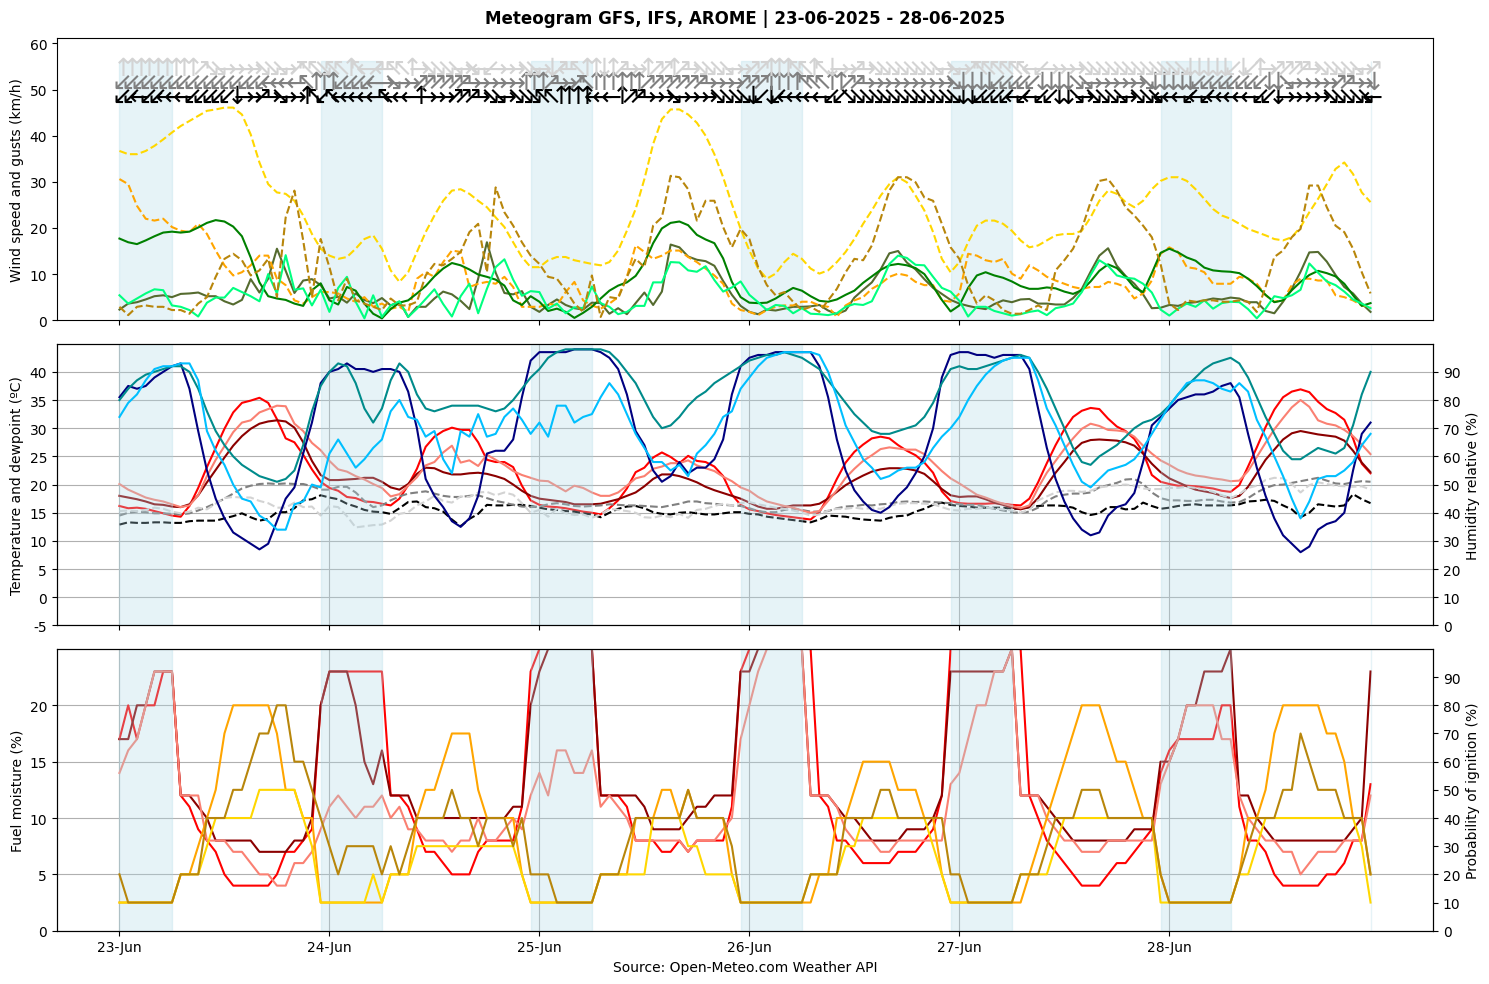

In [16]:
fechas = ['2025-06-23', '2025-06-28']
meteogram = MeteoPlot(sfc_data, fechas)